### Identificação e extração de texto

#### OCR (Optical Character Recognition)
- Imagens
- Arquivos PDF

#### RegEx


A maior parte dos pacores de OCR utilizam bibliotecas secundárias em C/C++, que fazem um "wrapper" (ou interface), de modo que o python apenas consulta a interface, operando com uma API

Para carregar as imagens, usar-se-á a biblioteca PIL, pois já há integração direta entre os objetos do tipo PIL para trabalhar o tesseract, facilitando muito o seu uso

In [1]:
import pytesseract as ocr
from PIL import Image

phrase_low_contrast = ocr.image_to_string(Image.open('arquivos de apoio/imagem_test1.png'), lang='por')

In [ ]:
print(phrase_low_contrast)
print(len(phrase_low_contrast))

Como pode-se observar, não há uma detecção do texto, o que é evidenciado pelo contraste da imagem, que é muito pequeno

<img src="arquivos de apoio/imagem_test1.png" style="width: 500px">

Se mudarmos nossa imagem para uma imagem com maior contraste, vamos verificar o resultado

<img src="arquivos de apoio/imagem_test2.png" style="width: 500px">

In [ ]:
phrase_high_contrast = ocr.image_to_string(Image.open('arquivos de apoio/imagem_test2.png'), lang='por')

In [ ]:
print(phrase_high_contrast)

Voilá, podemos verificar que o texto é corretamente extraído

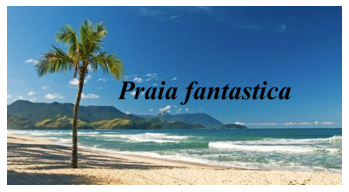

In [2]:
import matplotlib.pyplot as plt

im = Image.open('arquivos de apoio/imagem_test3.png')
plt.axis('off')
plt.imshow(im)
plt.show()

In [ ]:
phrase = ocr.image_to_string(im)

In [ ]:
print('Texto extraído:', phrase)

Novamente, vamos modificar o contraste do texto para aprimorar a leitura do texto da imagem:

In [ ]:
im = Image.open('arquivos de apoio/imagem_test4.png')
plt.axis('off')
plt.imshow(im)
plt.show()

In [ ]:
phrase = ocr.image_to_string(im)
print('Texto extraído:', phrase)

Nesses casos, caso nem isso resolva, por conta de algum elemento de imagem que esteja causando ruído na leitura (nesse caso, temos as ondas do mar e nuvens 'confundindo' a leitura), podemos delimitar a região a ser lida, de modo que reduza o efeito do ruído

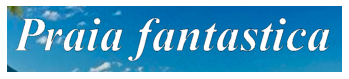

In [4]:
im = Image.open('arquivos de apoio/imagem_test5.png')
plt.axis('off')
plt.imshow(im)
plt.show()

In [6]:
phrase = ocr.image_to_string(im)
print('Texto extraído:', phrase)

Texto extraído: Praia fantastica



Há também a possibilidade de se transformar a imagem em tons de cinza, o que automaticamente eleva o contraste

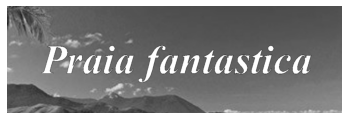

In [13]:
im = Image.open('arquivos de apoio/imagem_test6.png')
plt.axis('off')
plt.imshow(im)
plt.show()

In [14]:
phrase = ocr.image_to_string(im, lang='por')
print('Texto extraído:', phrase)

Texto extraído: - Práia fantastica

am a o so



### OCR em arquivos PDF

- o primeiro passo, geralmente é transformar o PDF em um arquivo de imagem


Para transformar PDF em imagem, há diversos pacotes para isso, sendo os mais utilizados:

- wand
- pdf2image -> wrapper python para a biblioteca poppler



In [2]:
from PIL import Image
import pytesseract as ocr
import sys
from pdf2image import convert_from_path

imagem_paginas = convert_from_path('arquivos de apoio/pdf_test.pdf')

In [3]:
import matplotlib.pyplot as plt

for i, pagina in enumerate(imagem_paginas):
    filename = f"paginas/pagina_{i}.png"
    print(f'Gravando a página: {filename}')
    pagina.save(filename, 'PNG')

Gravando a página: paginas/pagina_0.png
Gravando a página: paginas/pagina_1.png


In [4]:
# lib para poder acessar todos os arquivos de um diretório
import glob

In [7]:
files = glob.glob('paginas/*')

texto = []

for filename in files:
    t = ocr.image_to_string(Image.open(filename), lang="por")
    texto.append(t)


for i, t in enumerate(texto):
    print(5*'**', f'Texto da página {i}',5*'**', end='\n')
    print(texto[i], end='\n')

********** Texto da página 0 **********
Corona em São Carlos

A Vigilância Epidemiológica de São Carlos confirmou nesta sexta-feira (10/04) a situação
epidemiológica do município para o novo coronavírus (COVID-19).

Estão internadas neste momento 29 pessoas, sendo 16 adultos (enfermaria), 4 crianças
(enfermaria), 7 adultos em UTI (Unidade de Terapia Intensiva) e 1 criança na UTI. Uma
pessoa de outro município também continua internada em São Carlos na UTI.

Portanto o município contabiliza neste momento 6 casos positivos, com 2 mortes
confirmadas, outras 4 mortes suspeitas continuam em investigação. 51 casos já foram
descartados, já que foi liberado mais 1 resultado negativo para a COVID-19 por laboratório
credenciado ao Instituto Adolfo Lutz.

NOTIFICAÇÕES -— Já passaram pelo sistema de notificação de Síndrome Gripal do
município 1.193 pessoas desde o dia 21 de março, sendo que 687 pessoas já cumpriram o
período de isolamento de 14 dias e 506 ainda continuam em isolamento. Essas pesso

### Uso de Expressões Regulares (RegEx)

- importar o package 're'

In [9]:
import re

texto = 'O pacote RE é complicado no começo, mas é só no commmeço'

print(re.findall('com*', texto))

['co', 'com', 'com', 'commm']


Nesse caso, há a busca por todas as ocorrências de 'co', seguidas ou não por 'm', não importando o seu número de repetições

- O símbolo '*' permite que sejam encontradas 0~n repetições de uma determinada expressão: nesse caso, usou-se do caractere 'm'

- O símbolo '\[...\]' permite encontrar qualquer um dos caracteres que aparecer dentro do conjunto

In [10]:
print(re.findall('co[tm]', texto))

['cot', 'com', 'com', 'com']


In [11]:
print(re.findall('co[tm]*', texto))

['cot', 'com', 'com', 'commm']


Símbolo '+'

- encontra 1 ocorrência ou mais de uma determinada expressão

In [12]:
texto = 'Nesta sequência várias vezes apareceriam ia, '
texto += ' mas quantas seriammm? ia sozinho só vai aparecer '
texto += 'quando * for usado'

In [13]:
# busca da sequência 'ia' seguida por ',' ou 'm'
print(re.findall('ia[,m]', texto))

['iam', 'ia,', 'iam']


In [16]:
# com o '+', múltiplas ocorrências de ',' ou de 'm' são válidas
print(re.findall('ia[,m]+', texto))

['iam', 'ia,', 'iammm']


In [17]:
# com o '*', múltiplas ocorrências de ',' ou 'm' também são válidas, porém 'ia' seguido por outros caracteres também será capturado

print(re.findall('ia[,m]*', texto))

['ia', 'ia', 'iam', 'ia,', 'iammm', 'ia']


#### Símbolos \d e \w

- \d: corresponde aos dígitos \[0-9\]
- \w: corresponde a qualquer caractere alfanumérico \[a-zA-Z0-9\]

In [18]:
texto = 'Nesta sequência várias vezes apareceriam ia, '
texto += 'mas ia0 aparece só'

In [20]:
print(re.findall('ia[a-zA-Z]', texto))

['ias', 'iam']


In [21]:
print(re.findall('ia\w', texto))

['ias', 'iam', 'ia0']


In [22]:
texto = 'afde 86,87 asdf178,2324   45432,asg 1235'

In [24]:
print(re.findall('\d\d,', texto))

['86,', '78,', '32,']


In [26]:
print(re.findall('[\d]+,', texto))

['86,', '178,', '45432,']


Exemplo: máscara para buscar CPF

In [27]:
texto = '123.456.789-00'

In [29]:
print(re.findall('[\d\d\d].[\d\d\d].[\d\d\d]-[\d\d]', texto))

['6.789-0']


### Resumão RegEx

- []: simboliza qualquer caracter, ou conjunto, dentro deles
    - ex: \[a-zA-Z\]: caracteres de a~z e A~Z
- '.': encontre qualquer coisa (coringa)

- \d: dígitos
- \D: não dígitos
- \s: espaço
- \S: não espaço
- \w: letras e números
- \W: não letras e não números

- '\Axxx' ou '^xxx': começa com 'xxx' -> A inicia o alfabeto, começa tirando o chapéu (^)
- 'xxx\Z' ou 'xxx\$': termina com 'xxx' -> Z encerra o alfabeto, termina pagando a conta (\$)

- \b: limites (boundaries) -> antes do começo e depois do fim

In [2]:
import re

s = 'AZ#-1'

re.findall(r'\b\d', s)

['1']

#### +, *, ? e {} - repetições de caracteres

- *: ocorre 0+ vezes
- ?: ocorre 0/1 vez
- +: ocorre 1+ vezes
- {2,4}: ocorre entre 2 e 4 vezes 